In [22]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [23]:
y=df.iloc[:100,4].values
y=np.where(y==0,-1,1)
X=df.iloc[:100,[0,2]].values


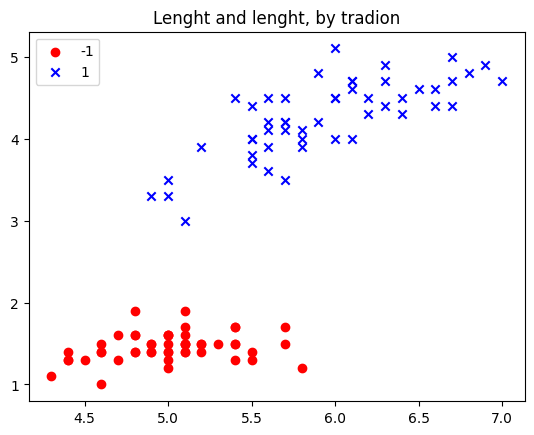

In [24]:
plt.scatter(X[:50,0],X[:50,1],label='-1',color='r',marker='o')
plt.scatter(X[50:100,0],X[50:100,1],color='b',label='1',marker='x')
plt.title('Lenght and lenght, by tradion')
plt.legend()

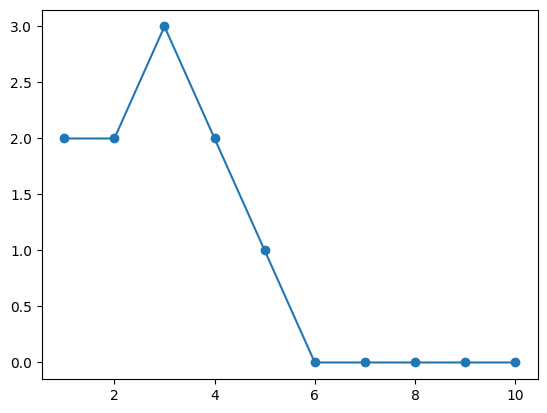

In [25]:
from perceptron_class import Perceptron
model=Perceptron()
model.fit(X,y)
# len(model.errors_)+1 - In this context, it means the number of training epochs
plt.plot(range(1,len(model.errors_)+1),model.errors_,marker='o')

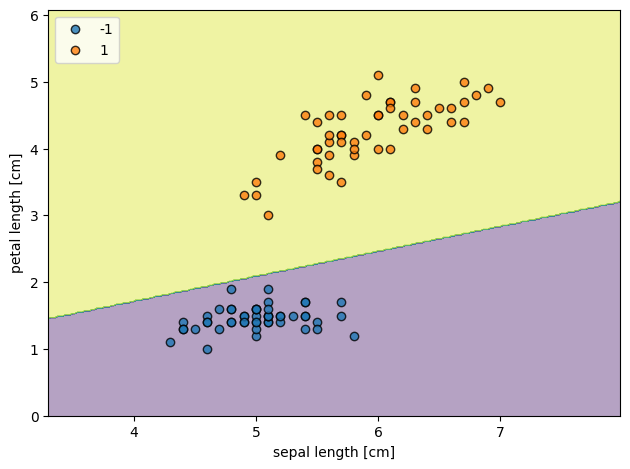

In [26]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8,
                    edgecolor='black',
                    label=cl)
plot_decision_regions(X, y, classifier=model)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()